# Lecture 20: Intro to Neural Networks

Plan:
1. Set up imports
2. Load CIFAR-10 images data using pickle
3. Write a function to view an image
4. Train/test split
5. Model fitting
6. Accuracy Evaluation
7. Investigate how hidden layer architecture affects accuracy
7. Activity: Investigate how activation function affects accuracy

In [1]:
# set up imports
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load the CIFAR-10 data
with open('cifar_data', 'rb') as file:
    cifar_data = pickle.load(file, encoding='latin1')

type(cifar_data)

dict

In [3]:
# get image data and label data
image_data = cifar_data['data']
label_data = cifar_data['labels']

len(label_data)

10000

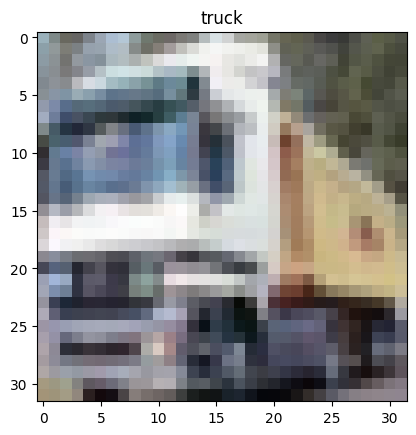

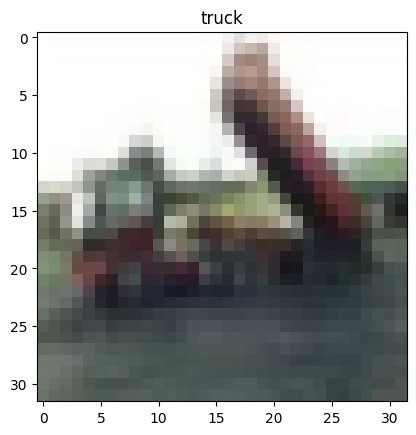

In [4]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_image(image, label):
    # reshape the image data into (3 x 32 x 32)
    img = image.reshape(3, 32, 32)

    # reorder the dimensions for matplotlib
    img = img.transpose(1, 2, 0)

    # show image
    plt.imshow(img)
    plt.title(label_names[label])
    plt.show()

# test the function
show_image(image_data[1], label_data[1])
show_image(image_data[2], label_data[2])

In [5]:
# do train/test split
X_train, X_test, y_train, y_test = train_test_split(image_data, label_data, random_state=42)

X_train.shape

(7500, 3072)

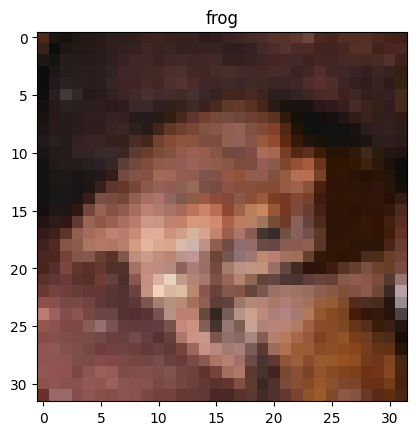

In [6]:
show_image(X_test[0], y_test[0])

In [7]:
# define our model
clf = MLPClassifier(random_state=42)

# train the model
clf.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [8]:
# make predictions
y_pred = clf.predict(X_test)

# determine the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.094

In [18]:
# investigate how hidden layer shape affects accuracy
hidden_layer_sizes = [
    (50,),
    (100,),
    (100, 100),
    (100, 100, 100),
]

accuracy_score_list = []

# loop over hidden layer shapes, train model, and record accuracy
for hidden_layer_size in hidden_layer_sizes:
    print(hidden_layer_size)

    # define the model
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, random_state=42)

    # train the model
    clf.fit(X_train, y_train)

    # make predictions
    y_pred = clf.predict(X_test)

    # evaluate model and save accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_score_list.append(accuracy)

accuracy_score_list

(50,)
(100,)
(100, 100)
(100, 100, 100)


[0.094, 0.094, 0.3308, 0.3728]

Text(0.5, 1.0, 'Effect of Hidden Layer Shape on NN Accuracy')

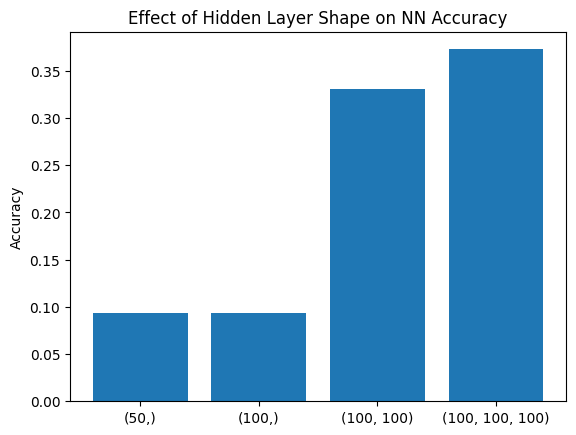

In [19]:
# make a bar graph
labels = [str(shape) for shape in hidden_layer_sizes]

plt.bar(labels, accuracy_score_list)
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Shape on NN Accuracy')

In [ ]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

# make a blank list to store accuracy scores

# loop over the activation functions

# define, train, and evaluate model with give activation function

# store accuracy in the list

# generate a bar graph of accuracy